In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to numbers...
q-values estimated...
ranks computed...
features normed...
file ready!


Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/2 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/2 done!


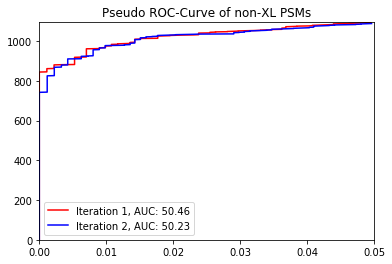

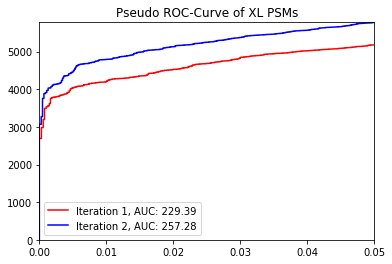

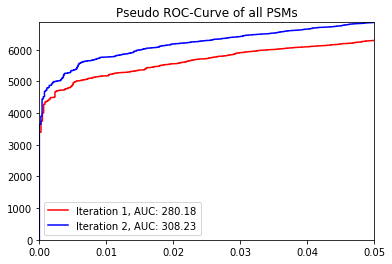

In [2]:
p = percolator(dSlow, idCol, features, I = 2, plotEveryIter = True, plotSaveName = 'Test.png')

In [3]:
dSlow.head()

,SpecId,Label,ScanNr,ExpMass,CalcMass,mass,peplen,charge2,charge3,charge4,...,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,Peptide,Proteins,FDR,q-val,class-specific_q-val,Rank
15534,controllerType=0controllerNumber=1scan=8704,1,8704,0.628104,0.628105,0.628104,0.772727,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
15647,controllerType=0controllerNumber=1scan=8757,1,8757,0.628107,0.628105,0.628107,0.772727,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGK.S,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
12279,controllerType=0controllerNumber=1scan=7273,1,7273,0.479916,0.479915,0.479916,0.863636,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,R.GGSGGSHGGGSGFGGESGGSYGGGEEASGSGGGYGGGSGKSSHS.-,sp|P35527|K1C9_HUMAN,0.0,0.0,0.0,1
14073,controllerType=0controllerNumber=1scan=7991,1,7991,0.857004,0.857001,0.857004,0.590909,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,0.0,1
14191,controllerType=0controllerNumber=1scan=8046,1,8046,0.857005,0.857001,0.857005,0.590909,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,K.KKEEEEDEEDEEDEEEEEDEEDEDEEEDDDDE.-,sp|P09429|HMGB1_HUMAN,0.0,0.0,0.0,1


In [4]:
df = dSlow
decoys = df.loc[df.Label == 0]
targets = df.loc[df.Label == 1]
sd = set(decoys.Peptide)
st = set(targets.Peptide)
u = set.intersection(sd, st)
c = np.bincount([ord(s[0]) for s in df.Peptide])
n = [chr(i) for i in range(len(c))]
s = pd.Series(c, index= n)
s.loc[s != 0]

-     2141
A        1
D        1
K    48760
R    42316
dtype: int64

In [5]:
c = np.bincount([ord(s[-1]) for s in df.Peptide])
n = [chr(i) for i in range(len(c))]
s = pd.Series(c, index= n)
s.loc[s != 0]

-     892
A    6500
C    2355
D    4398
E    7971
F    3143
G    6510
H    2259
I    3980
K    7571
L    8625
M    1874
N    3921
Q    4361
R    6568
S    7316
T    4715
U       1
V    4980
W    1114
Y    4165
dtype: int64

In [6]:
ls = [4,5,1]
s.loc[~s.isin(ls)]

         0
        0
        0
        0
        0
        0
        0
        0
        0
\t       0
\n       0

        0

        0
\r       0
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0

        0

        0
      ... 
;        0
<        0
=        0
>        0
?        0
@        0
A     6500
B        0
C     2355
D     4398
E     7971
F     3143
G     6510
H     2259
I     3980
J        0
K     7571
L     8625
M     1874
N     3921
O        0
P        0
Q     4361
R     6568
S     7316
T     4715
V     4980
W     1114
X        0
Y     4165
Length: 89, dtype: int64

In [7]:
def test(a):
    a.append(1)
    return a,5

b = [1,2,3]
c = test(b)
print(c)

([1, 2, 3, 1], 5)
